<a href="https://colab.research.google.com/github/outlaw-xd/Nifty50_Analysis/blob/main/clustering_of_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering

In [ ]:
drive.mount('/content/drive')
file_path ='/content/drive/MyDrive/nifty_50.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322.0,8.841500e+09,25.91,4.63,0.95
1,2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872.0,1.973690e+10,26.67,4.76,0.92
2,2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431.0,3.084790e+10,25.97,4.64,0.95
3,2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875.0,2.531180e+10,26.32,4.70,0.94
4,2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945.0,1.914630e+10,26.25,4.69,0.94


In [ ]:
data = df[['Close', 'Volume']].dropna()

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Create normalized DataFrame
norm_df = pd.DataFrame(normalized_data, columns=['Close', 'Volume'])
norm_df.head()

,Close,Volume
0,0.064129,0.013238
1,0.068169,0.020657
2,0.064442,0.033565
3,0.066336,0.027554
4,0.065962,0.029235


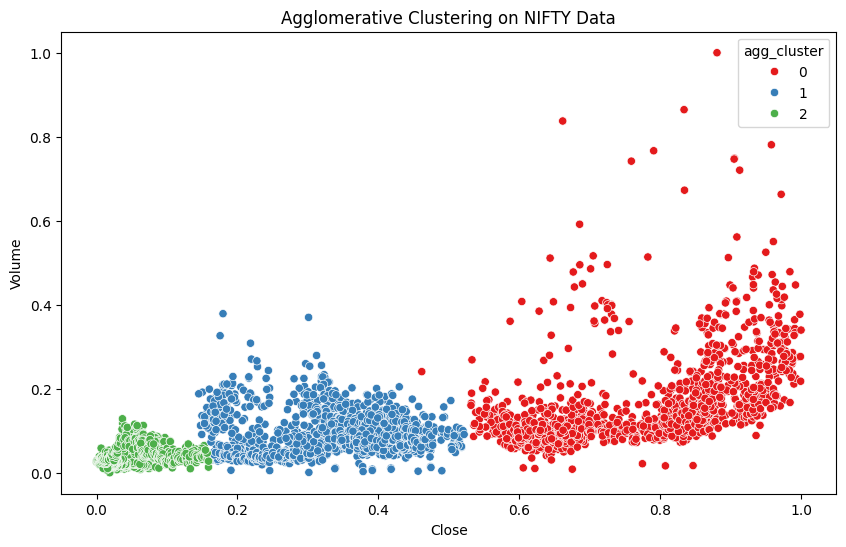

In [ ]:
X = norm_df[['Close', 'Volume']]

# Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Can also try 'single', 'complete', 'average'
norm_df['agg_cluster'] = agg.fit_predict(X)

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=norm_df, x='Close', y='Volume', hue='agg_cluster', palette='Set1')
plt.title('Agglomerative Clustering on NIFTY Data')
plt.show()

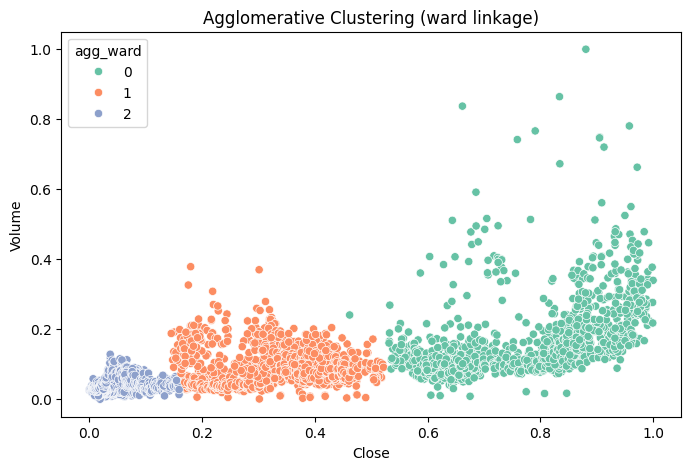

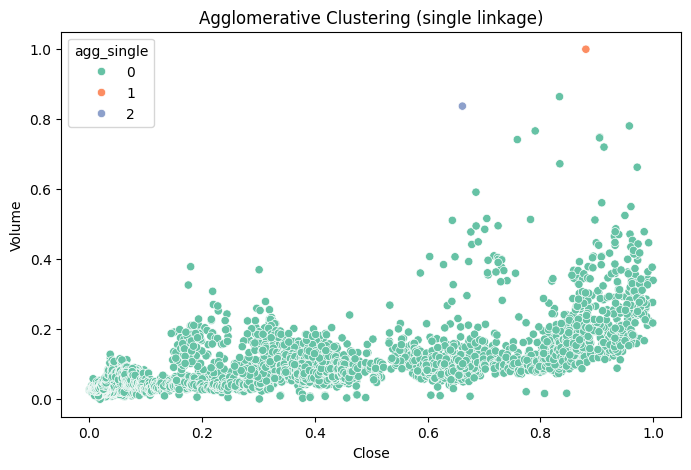

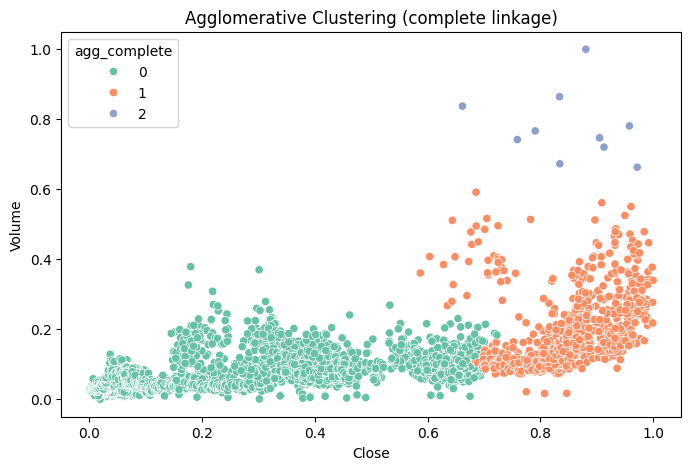

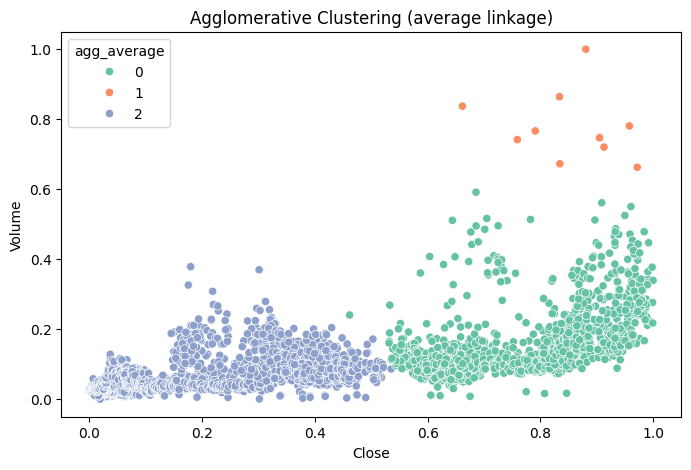

In [ ]:
linkages = ['ward', 'single', 'complete', 'average']

for link in linkages:
    model = AgglomerativeClustering(n_clusters=3, linkage=link)
    norm_df[f'agg_{link}'] = model.fit_predict(X)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=norm_df, x='Close', y='Volume', hue=f'agg_{link}', palette='Set2')
    plt.title(f'Agglomerative Clustering ({link} linkage)')
    plt.show()

In [ ]:
results = []
for link in linkages:
    if link == 'ward':
        model = AgglomerativeClustering(n_clusters=3, linkage=link)
    else:
        model = AgglomerativeClustering(n_clusters=3, linkage=link, metric='euclidean')

    labels = model.fit_predict(X)

    # Store evaluation metrics
    results.append({
        'Linkage': link.title(),
        'Silhouette Score': round(silhouette_score(X, labels), 4),
        'Davies-Bouldin Index': round(davies_bouldin_score(X, labels), 4),
        'Calinski-Harabasz Index': round(calinski_harabasz_score(X, labels), 2)
    })

results_df = pd.DataFrame(results)

print("Agglomerative Clustering Metrics by Linkage Method:\n")
print(results_df.to_string(index=False))

Agglomerative Clustering Metrics by Linkage Method:

 Linkage  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Index
    Ward            0.6069                0.5164                 14848.90
  Single            0.5784                0.2833                     9.91
Complete            0.5173                0.4834                  2786.41
 Average            0.5935                0.5081                  5556.32
